## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

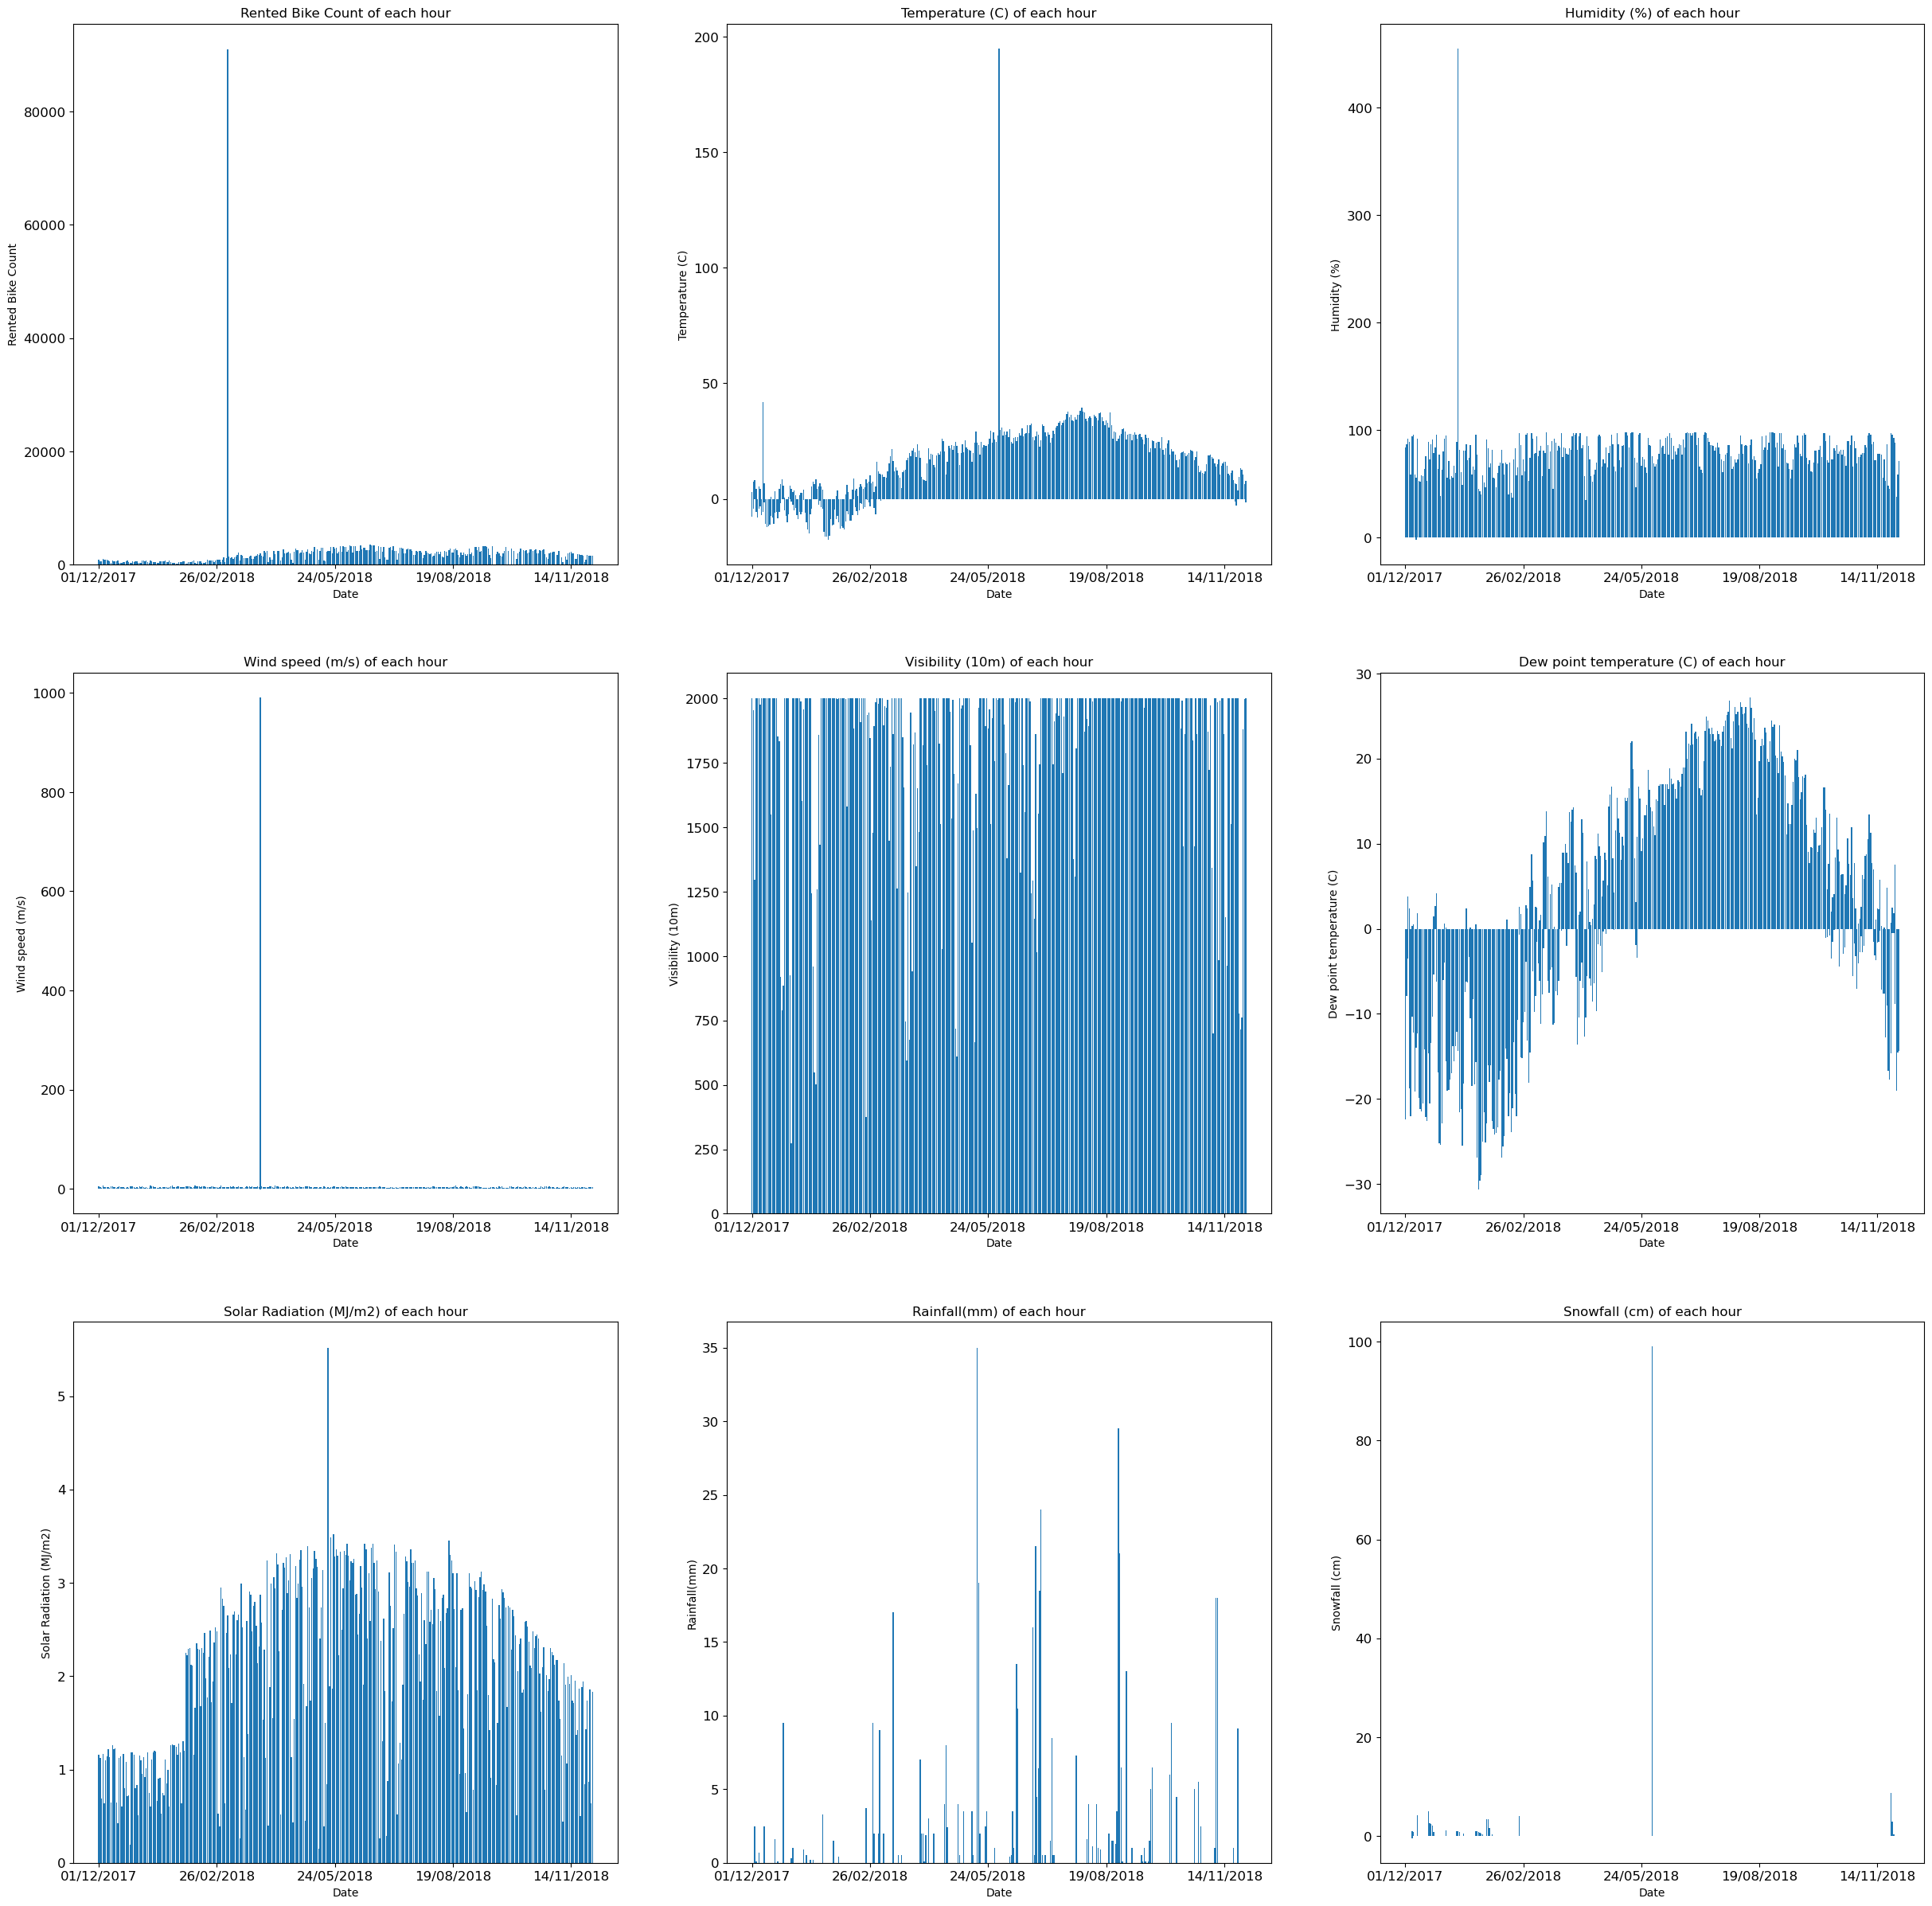

In [2]:
### Your code here

#
# 1. Load the data set from the csv file into a DataFrame,
#    summarise it in text using one pandas function.
#
bike = pd.read_csv('SeoulBikeData.csv')
bike.info()

#
# 2. Visualize each feature with one type of plot.
#

# According to the output of info(), "Solar Radiation (MJ/m2)", "Rainfall (mm)", and "Snowfall (cm)" are all of object type. 
# However, conceptually, they should be numeric. To ensure these features can be plotted correctly, 
# we need to convert them to numeric types before plotting.
object_feature = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for feature in object_feature:
    bike[feature] = bike[feature].apply(pd.to_numeric, errors='coerce')

# Function that will plot each feature
def plot_features(df, label_set):
    """Plot features with Date"""
    x_bar = df['Date']
    plt.figure(figsize=(30, 30))

    for i, label in enumerate(label_set):
        plt.subplot(3, 3, i + 1)
        plt.bar(x=x_bar, height=df[label])
        plt.title(f'{label} of each hour')
        plt.xlabel('Date')
        plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(x_bar) // 100))
        plt.ylabel(label)

# Plot each feature
plot_features(bike, [
    'Rented Bike Count', 'Temperature (C)', 'Humidity (%)',
    'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
])

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [3]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

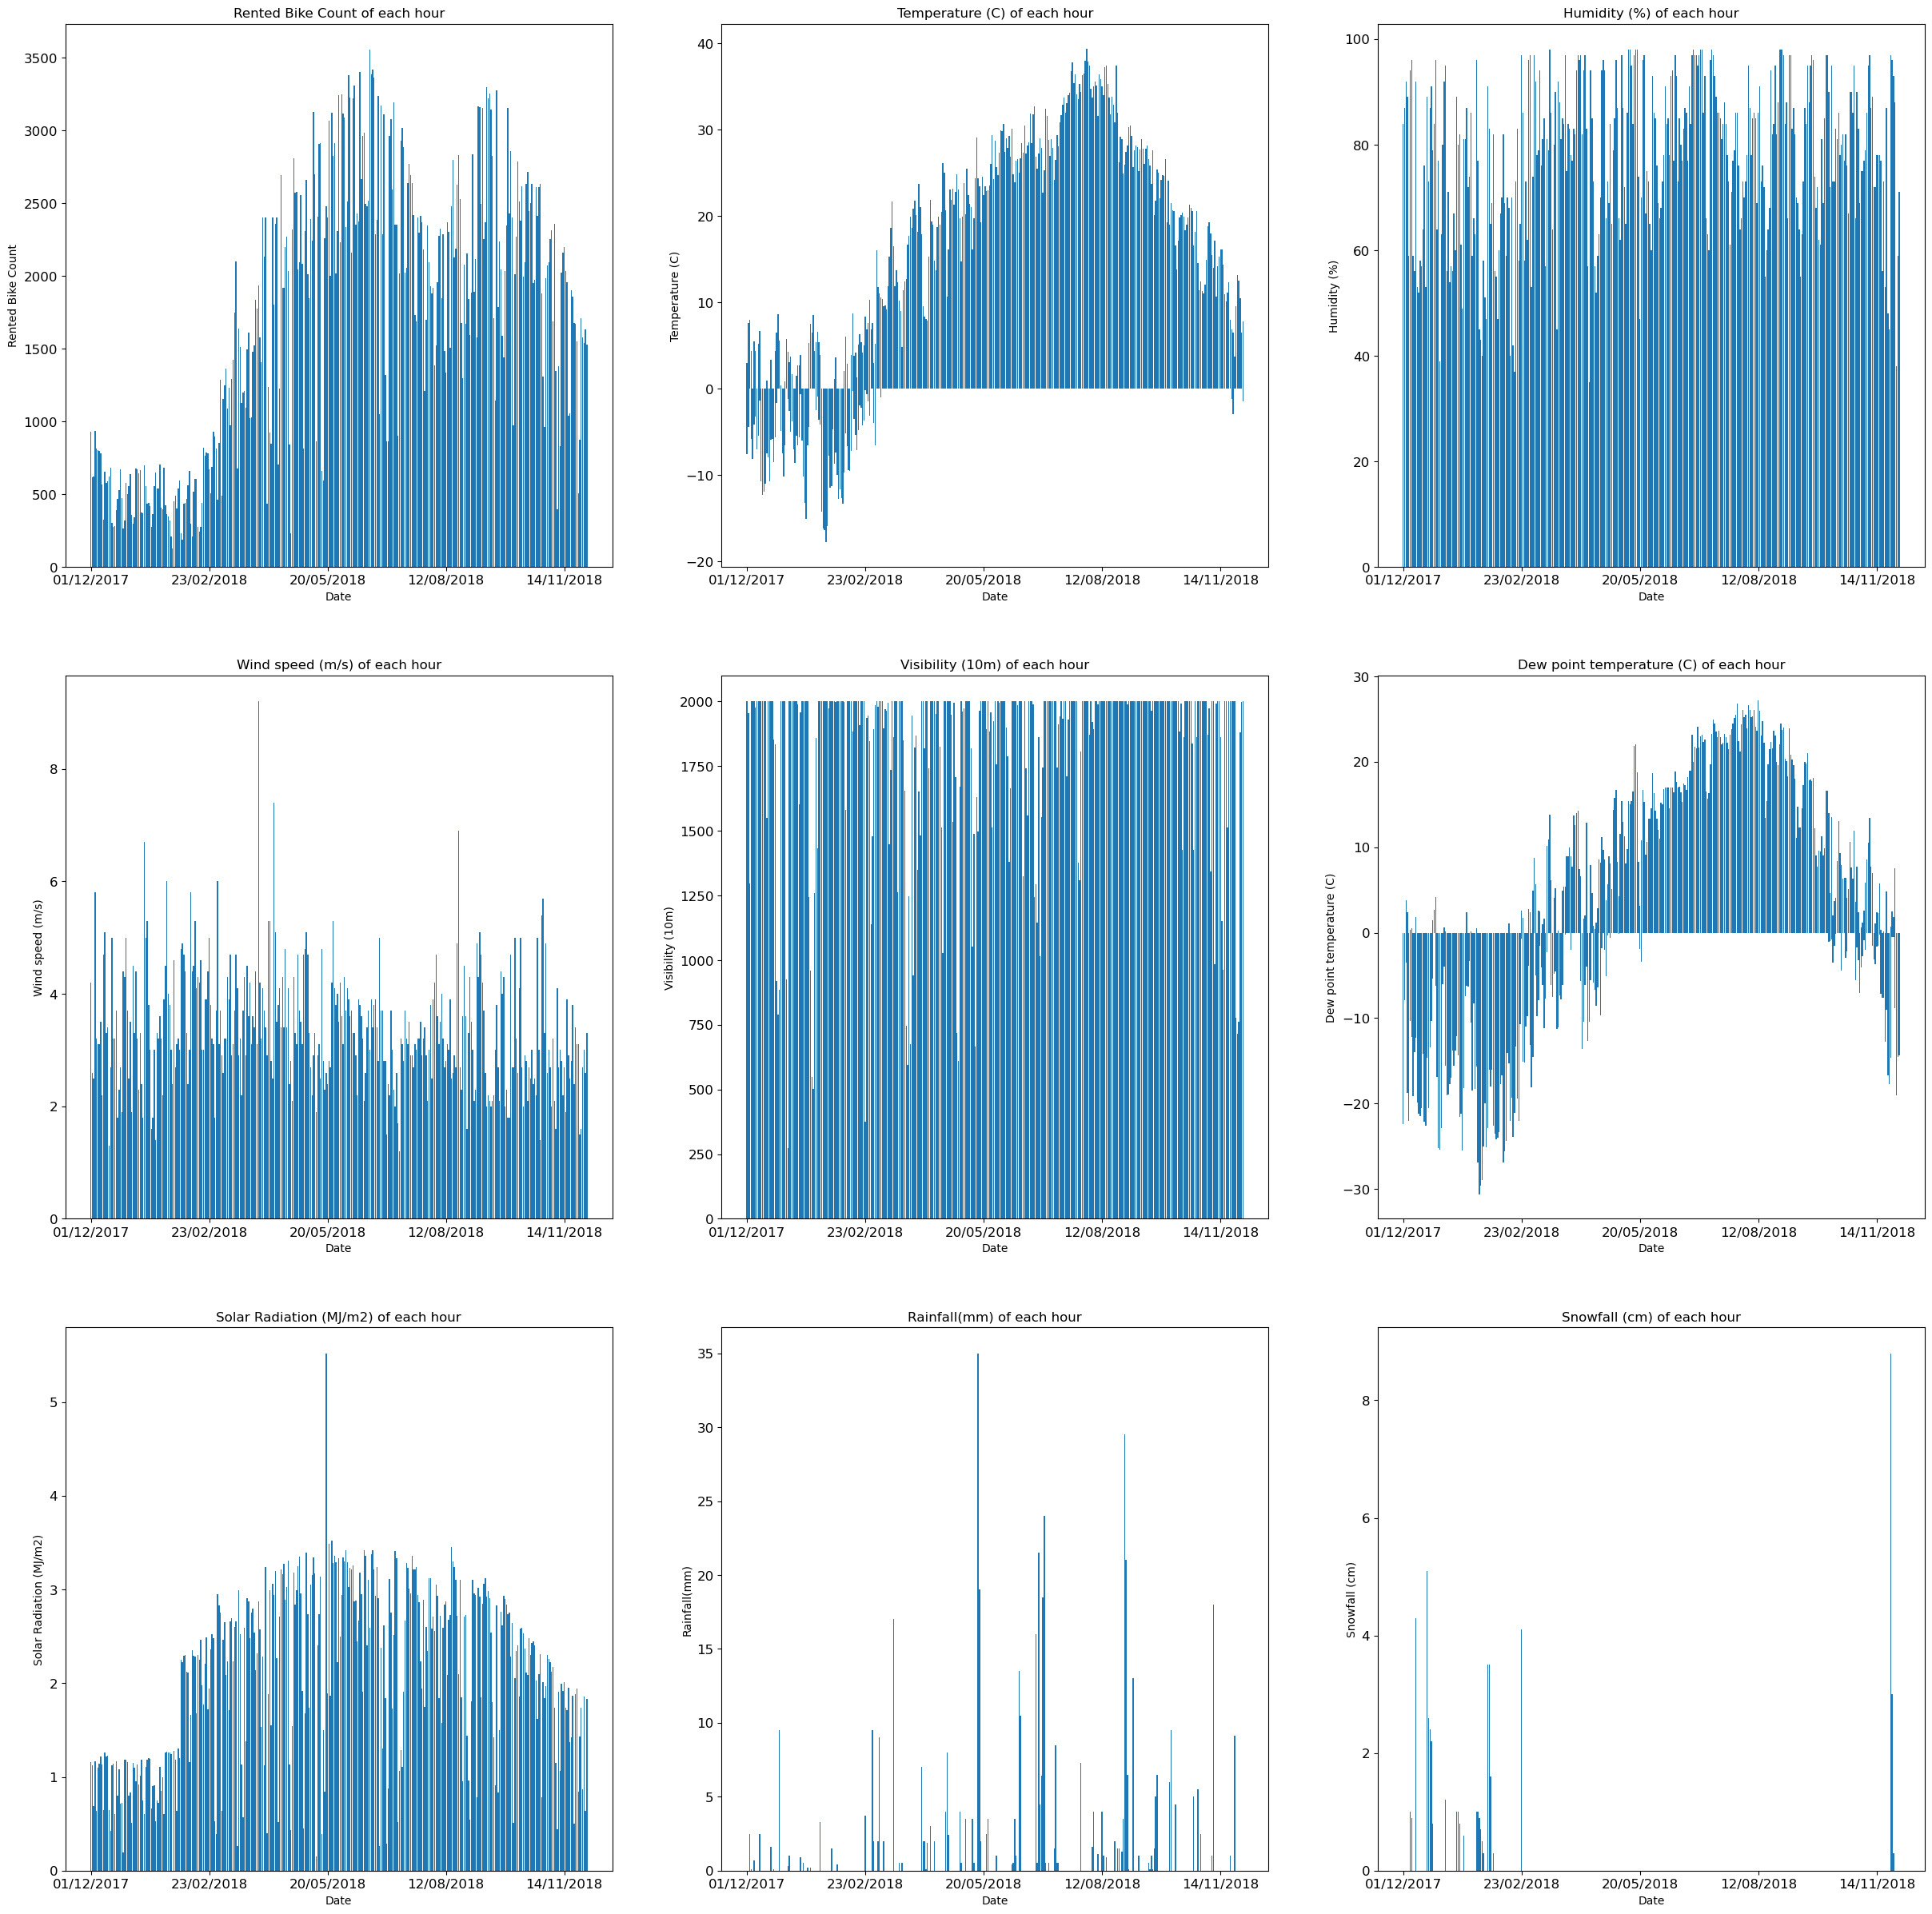

In [4]:
### Your code here (and remember to upload the resulting csv)


#
# 1. Using the "Functioning day" feature, remove rows
#    from the DataFrame where the business is closed 
#    and then delete the Functioning Day feature from
#    the DataFrame.
#
bike = bike[bike["Functioning Day"] == 'Yes']
bike.drop(columns="Functioning Day", inplace=True)


#
# 2. Convert seasons to a one hot encoded format
#    (1 binary feature for each of the 4 seasons).
#
bike = pd.get_dummies(bike, columns=['Seasons'])


#
# 3. Replace the Date feature with a binary Weekday feature
#    (1 for a weekday and 0 for weekend) using the code 
#    sample below or your own code.
#
# We will preserve the 'Date' column for now, as it is needed for plotting figures later. 
# It will be deleted before saving the data to a CSV file.
bike.insert(1, 'Weekday', bike['Date']) 
bike['Weekday'] = bike['Weekday'].apply(date_is_weekday)


#
# 4. Convert remaining non-numerical features to a numerical 
#    format or replace with NaN (i.e. `np.nan`) 
#    where not possible.
#
# 'Solar Radiation (MJ/m2)', 'Rainfall (mm)', and 'Snowfall (cm)' have already been converted to numerical format above for accurate plotting.
# Therefore, there is no need to convert them again here.
bike['Holiday'] = bike['Holiday'].map({'No Holiday': 0, 'Holiday': 1})


#
# 5. Identify and fix any outliers and errors in the data
# Since automated methods often lack contextual understanding in outlier and error detection,
# we will manually identify and address any anomalies in the data. 
# Upon reviewing the dataset, we have observed certain suspicious points or errors, 
# which we will manually assess and remove as necessary.

# 5.1 Rented Bike Count: Identify a 'potential' erroneous value, which is over 80,000,
#     while all other data points are less than 5,000.
bike = bike[bike['Rented Bike Count'] < 80000]


# 5.2 Temperature (C): Identify 'potential' erroneous values which are over 150.
#     Additionally, temperatures above 40 observed in winter are also suspicious.
#     Since the maximum value of this feature in the rest of the data is less than 40,
#     we will use 40 as a threshold to filter out the suspicious data points.
bike = bike[bike['Temperature (C)'] < 40]

# 5.3 Humidity (%): This feature should between 0 - 100.
bike = bike[bike['Humidity (%)'] <= 100.0]
bike = bike[bike['Humidity (%)'] >= 0.0]

# 5.4 Wind speed (m/s): This feature should be positive. 
#     We identified a 'potential' erroneous value over 800. After plotting the results,
#     we also observed another outlier over 80, while all other values are less than 10.
#     Therefore, we remove both 'potential' erroneous values.
bike = bike[bike['Wind speed (m/s)'] < 80.0]
bike = bike[bike['Wind speed (m/s)'] >= 0.0]

# 5.5 Visibility (10m): We did not detect any obvious erroneous data points or outliers for 'Visibility (10m)'

# 5.6 Dew point temperature (C): We did not detect any obvious erroneous data points or outliers for 'Dew point temperature (C)'

# 5.7 Solar Radiation (MJ/m²): For 'Solar Radiation (MJ/m²)', the plot shows one point significantly higher than the rest, with a value over 5,
#     while all other values are below 4. Automatic methods might remove this as an outlier. However, after reviewing relevant information,
#     we know that a radiation value over 5 in Seoul is possible. Therefore, we did not consider this as an outlier that should be removed.

# 5.8 Rainfall(mm): We did not detect any obvious erroneous data points or outliers for 'Rainfall(mm)'

# 5.9 Snowfall (cm): This feature should be positive. 
#     Additionally, a 'potential' erroneous value over 80cm in summer has been identified.
#     Since all other data points for this feature are less than 80 cm, even in winter, 
#     we will use 80cm as a threshold to filter out the suspicious points.
bike = bike[bike['Snowfall (cm)'] < 80.0]
bike = bike[bike['Snowfall (cm)'] >= 0.0]

plot_features(bike, [
    'Rented Bike Count', 'Temperature (C)', 'Humidity (%)',
    'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
])

#
# 6. Save the result as a new csv file called 
#    CleanedSeoulBikeData.csv`
#
bike.drop(columns='Date', inplace=True)  # Remove 'Date' column before saving.
bike.to_csv('CleanedSeoulBikeData.csv', index=False)

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [5]:
### Your code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


bike_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [6]:
### Your code and outputs here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#
# 1. Split the data so that 20% of it will be kept as
#    a hold-out test set.
# 
train_set, test_set = train_test_split(bike, test_size=0.2, random_state=1901276)
x_train = train_set.drop(columns='Rented Bike Count')
y_train = train_set['Rented Bike Count'].copy()
x_test = test_set.drop(columns='Rented Bike Count')
y_test = test_set['Rented Bike Count'].copy()


#
# 2. Using the pipeline, pre-process and fit a linear 
#    regression model to the data.
#
# The instructions require us to "use the pipeline you wrote above".
# Here, we want to add a regression model to the existing pipeline.
# Instead of redefining a new pipeline, we use Pipeline.steps.append() to add the regression model to the existing pipeline.
# 
bike_pipeline.steps.append(
    ('lr', LinearRegression())
)
bike_pipeline.fit(x_train, y_train)


#
# 3.Calculate and print the RMSE of the fit to the 
#   training data.
#
y_pred = bike_pipeline.predict(x_train)
rmse_lr = np.sqrt(mean_squared_error(y_pred, y_train))
print(f'RMSE of the LR model (training): {rmse_lr}')


#
# 4. Also calculate and print the RMSE with all the predictions
# being the mean of the training targets.
#
avg = np.ones_like(y_train) * y_train.mean()
rmse_avg = np.sqrt(mean_squared_error(avg, y_train))
print(f'RMSE of the simple baseline: {rmse_avg}')


RMSE of the LR model (training): 433.98131993597167
RMSE of the simple baseline: 643.6718851847374


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [7]:
### Your ChatGPT prompt
# Help me to write some codes using sklearn pipelines that will do the following:
# - Fit a linear regression and a Support Vector Regression method to the data using 10-fold cross validation for each model
# - display the mean and standard deviation of the RMSE values for each model (at baseline) in the appropriate datasets
# - perform a hyper-parameter optimization on each model using GridSearch
# - display the mean and standard deviation of the RMSE values for each model (after optimization) in the appropriate datasets
# - choose the best model and visualize the results with a single graphic of your choice.

Linear Regression:
Baseline RMSE: 435.4072 ± 13.7726
Optimized RMSE: 435.4072 ± 13.7726

Support Vector Regression:
Baseline RMSE: 539.5753 ± 24.8541
Optimized RMSE: 395.2477 ± 20.1106

Best Model: Support Vector Regression
Best Parameters: {'regressor__C': 10, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'}


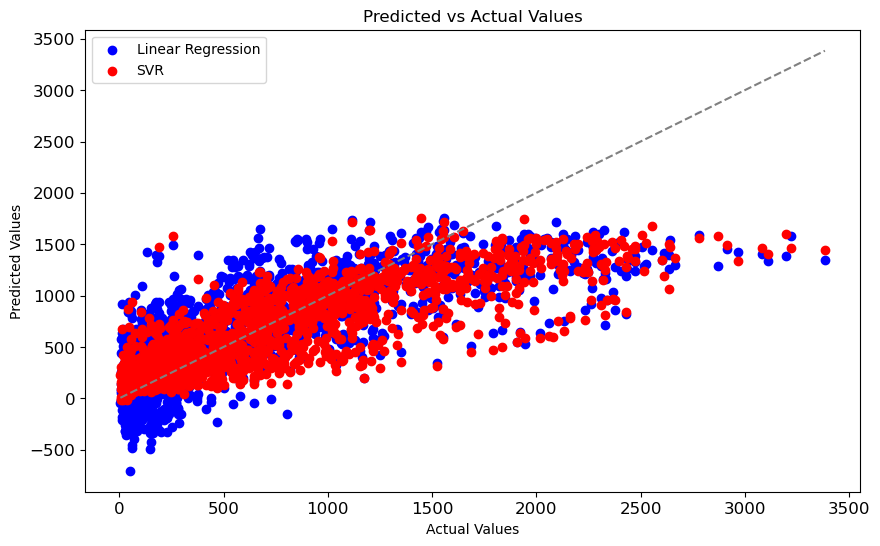

In [8]:
### Code here (with outputs)

# 1. Import Necessary Libraries:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 2. Define Pipelines for Linear Regression and SVR:
# Pipeline for Linear Regression
lr_pipeline = Pipeline([
    # MyFix: I added median imputer here.
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Pipeline for SVR
svr_pipeline = Pipeline([
    # MyFix: I added median imputer here.
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# 3. Define Parameters for GridSearch:
# Parameters for GridSearchCV
lr_params = {}
svr_params = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': [0.1, 1, 10],
    'regressor__gamma': ['scale', 'auto']
}

# 4. Perform Cross-Validation and Hyperparameter Optimization:
def evaluate_model(pipeline, params, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Baseline RMSE with cross-validation
    baseline_scores = -1 * cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    baseline_mean = np.mean(baseline_scores)
    baseline_std = np.std(baseline_scores)
    print(f"Baseline RMSE: {baseline_mean:.4f} ± {baseline_std:.4f}")

    # Hyperparameter optimization
    grid_search = GridSearchCV(pipeline, params, cv=cv, scoring='neg_root_mean_squared_error')
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    optimized_scores = -1 * cross_val_score(best_model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    optimized_mean = np.mean(optimized_scores)
    optimized_std = np.std(optimized_scores)
    print(f"Optimized RMSE: {optimized_mean:.4f} ± {optimized_std:.4f}")

    # MyFix: I added the return of optimized_mean for later comparison.
    # return best_model, best_params
    return best_model, best_params, optimized_mean

# Evaluate Linear Regression
print("Linear Regression:")
# MyFix: I defined "optimized_mean_lr" here with the value returned from the evaluate_model function
# lr_best_model, lr_best_params = evaluate_model(lr_pipeline, lr_params, x_train, y_train)
lr_best_model, lr_best_params, optimized_mean_lr = evaluate_model(lr_pipeline, lr_params, x_train, y_train)

# Evaluate SVR
print("\nSupport Vector Regression:")
# MyFix: I defined "optimized_mean_svr" here with the value returned from the evaluate_model function
# svr_best_model, svr_best_params = evaluate_model(svr_pipeline, svr_params, x_train, y_train)
svr_best_model, svr_best_params, optimized_mean_svr = evaluate_model(svr_pipeline, svr_params, x_train, y_train)

# 5. Choose the Best Model:
# Compare and choose the best model
if optimized_mean_lr < optimized_mean_svr:
    best_model = lr_best_model
    best_params = lr_best_params
    best_model_name = "Linear Regression"
else:
    best_model = svr_best_model
    best_params = svr_best_params
    best_model_name = "Support Vector Regression"

print(f"\nBest Model: {best_model_name}")
print(f"Best Parameters: {best_params}")

# 6. Visualize Results:
# Make predictions on the test set
y_pred_lr = lr_best_model.predict(x_test)
y_pred_svr = svr_best_model.predict(x_test)

# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_svr, color='red', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

### Your answer here (maximum of 200 words)
* The code I initially received from ChatGPT contained two errors.
* Firstly, it did not handle NaN value imputation, which was not specified in my initial prompt, so this omission is understandable.
* Secondly, the code referenced two undefined variables, "optimized_mean_lr" and "optimized_mean_svr," which are crucial for determining the superior model based on returned RMSE values.
* To resolve these issues, I made modifications to handle NaN value imputation and to assign the returned RMSE values to the variables "optimized_mean_lr" and "optimized_mean_svr." Following these adjustments, the code executed properly.